# Clasificación de Supernovas usando redes MLP
## usando los datos del extraidos del notebook SN_feature_extraction

In [48]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [49]:
url_features_fullfin='https://raw.githubusercontent.com/BenjaminIrarrazabal/Datos-Supernovas-Pruebas/main/features_fullfin.csv'
features_full = pd.read_csv(url_features_fullfin, index_col=None)
features_full

,oid,delta_mag_fid_1,positive_fraction_1,delta_mag_fid_2,positive_fraction_2,Multiband_period,PPE,Period_band_1,delta_period_1,Period_band_2,...,SPM_tau_fall_1,SPM_chi_1,SPM_A_2,SPM_t0_2,SPM_gamma_2,SPM_beta_2,SPM_tau_rise_2,SPM_tau_fall_2,SPM_chi_2,classALeRCE
0,ZTF17aadlxmv,2.244800,1.0,1.847730,1.0,51.630429,0.018797,0.200240,51.430189,0.069774,...,11.688850,0.007554,0.311686,6.958042,21.231870,0.416775,3.677212,30.091575,0.594409,SNIa
1,ZTF18aaaqexr,0.896138,1.0,0.191736,1.0,29.230770,0.000933,29.230770,0.000000,NaN,...,17.585409,0.281999,0.292699,-8.394195,9.801748,0.447687,8.599671,32.414657,NaN,SNIa
2,ZTF18aacdbzx,0.495977,1.0,0.786995,1.0,0.156563,0.004384,0.165508,0.008945,0.185710,...,24.821414,0.033287,0.114159,-5.114678,13.845587,0.063725,10.514456,20.820922,0.044529,SNIbc
3,ZTF18aadmssd,3.293953,1.0,2.170098,1.0,1.005344,0.056145,0.065053,0.940291,999.999953,...,22.204705,0.010855,2.067952,-22.606536,39.255644,0.755130,17.087420,46.760686,1.111489,SNIIn
4,ZTF18aadzfso,1.371363,1.0,0.797367,1.0,1.028361,0.034737,1.029866,0.001505,37.037036,...,14.225590,0.028317,0.257985,4.309859,18.030779,0.606823,3.959666,85.046548,0.027387,SNIa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,ZTF20abgbxfm,2.981503,1.0,2.216758,1.0,104.972373,0.126945,90.909084,14.063289,142.857138,...,24.208459,0.077253,0.287074,4.316311,14.243011,0.570416,4.845104,28.891699,0.040567,SNIa
2064,ZTF20abgdtmv,2.669654,1.0,1.719614,1.0,73.929961,0.074820,66.666664,7.263297,76.923075,...,10.058191,0.013802,0.245715,12.104669,2.379968,0.340972,6.101363,14.828741,0.039753,SNIa
2065,ZTF20abgfekk,1.627867,1.0,1.534458,1.0,1.016858,0.042308,999.999953,998.983094,999.999953,...,19.974876,0.045213,0.401462,5.696663,35.855804,0.521981,3.882842,30.064703,0.056440,SNIa
2066,ZTF20abgfljj,1.344170,1.0,2.227105,1.0,1.024148,0.016780,999.999953,998.975804,999.999953,...,4.324015,1.353607,0.145629,4.926039,8.235528,0.014039,2.534046,19.833969,0.047055,SNIa


In [50]:
count_clase0 = pd.DataFrame({'classALeRCE':features_full['classALeRCE']})
count_clase0 = count_clase0.groupby(count_clase0.columns.tolist(),as_index=False).size()
count_clase0

,classALeRCE,size
0,SLSN,34
1,SNII,330
2,SNIIb,16
3,SNIIn,42
4,SNIa,1540
5,SNIbc,106


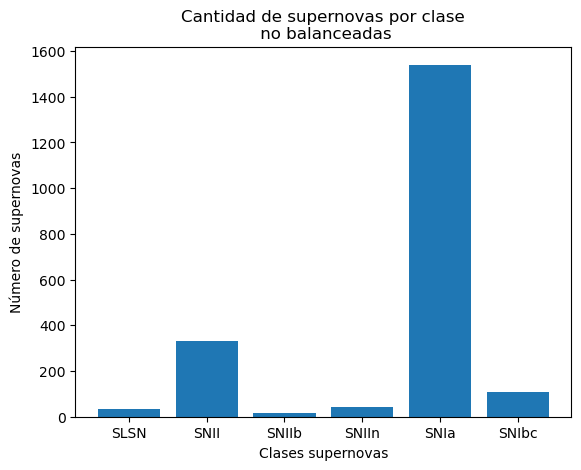

In [51]:
    
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


plt.bar(count_clase0['classALeRCE'], count_clase0['size'])
plt.title('Cantidad de supernovas por clase\n no balanceadas')
plt.ylabel('Número de supernovas')
plt.xlabel('Clases supernovas')
plt.show()


# Unión de las supernovas clase II
## Se unen las clases SNII,SNIIb,SNIIn	

Flag para realizar la clasificación multiclase o binaria, si binaria es True se realiza la clasificación binaria, en caso contrario se realiza la clasificación multiclase.

In [52]:
binaria= True

In [53]:
#Descomentar para la clasificación multiclase
if binaria == False:
    features_full['classALeRCE']= features_full['classALeRCE'].replace(['SNIIb','SNIIn','SNII'],'SNII')
    num_output = 4
else:
    # para la clasificación binaria
    features_full['classALeRCE']= features_full['classALeRCE'].replace(['SNIIb','SNIIn','SLSN','SNII','SNIbc'],'No SNIa')
    num_output = 2

In [54]:
count_clase1 = pd.DataFrame({'classALeRCE':features_full['classALeRCE']})
count_clase1 = count_clase1.groupby(count_clase1.columns.tolist(),as_index=False).size()
count_clase1

,classALeRCE,size
0,No SNIa,528
1,SNIa,1540


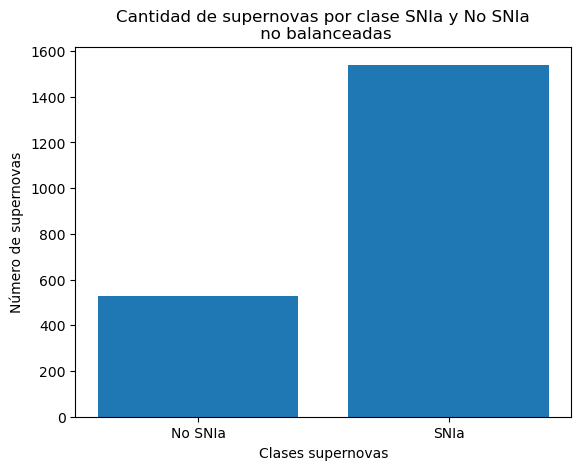

In [55]:
    
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)


plt.bar(count_clase1['classALeRCE'], count_clase1['size'])
plt.title('Cantidad de supernovas por clase SNIa y No SNIa\n no balanceadas')
plt.ylabel('Número de supernovas')
plt.xlabel('Clases supernovas')
plt.show()

    

In [56]:
cols = features_full.shape[1]
features_full = features_full.dropna(thresh=cols)


# Separación del conjunto en ENTRENAMIENTO y TEST:

Dividiremos el conjunto en 70% para entrenamiento y 30% para test


In [57]:
# SEPARAMOS LOS CONJUNTOS DE ENTRENAMIENTO Y VALIDACIÓN
le = LabelEncoder()
X = features_full.iloc[:,1:-1]
Y = features_full['classALeRCE']
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, stratify=Y)
# NORMALIZAMOS LOS DATOS
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

In [58]:
le.classes_

array(['No SNIa', 'SNIa'], dtype=object)

In [59]:
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dropout

In [60]:
from tensorflow.keras.utils import to_categorical

In [61]:
## Defining various initialization parameters for 163-80-40-4 MLP model
num_classes = 4
num_features = X_train.shape[1]
feature_vector_length = X_train.shape[1]


starter_learning_rate = 0.001
regularizer_rate = 0.1

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (118,)


In [62]:
from datetime import datetime
# Define the Keras TensorBoard callback.
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

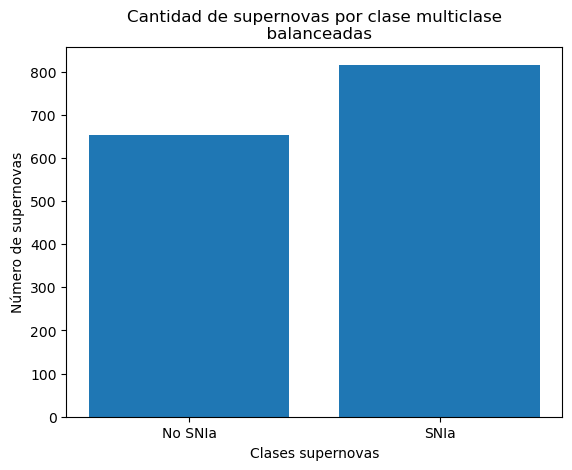

In [63]:
import time
inicio = time.time()

from sklearn import metrics


if binaria == True:
    oversample1 = SMOTE(sampling_strategy = 0.8)
else:
    oversample1 = SMOTE(sampling_strategy = {0:340,1:650,2:816,3:530}) 

X_train_smote, Y_train_smote = oversample1.fit_resample(X_train, Y_train)


count_clase5 = pd.DataFrame({'classALeRCE': Y_train_smote})
count_clase5 = count_clase5.groupby(count_clase5.columns.tolist(),as_index=False).size()
count_clase5


import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

plt.bar(le.classes_,count_clase5['size'].values)
plt.title('Cantidad de supernovas por clase multiclase\n  balanceadas')
plt.ylabel('Número de supernovas')
plt.xlabel('Clases supernovas')
plt.show()






In [78]:
import time
inicio = time.time()

from sklearn import metrics


if binaria == True:
    oversample1 = SMOTE(sampling_strategy = 0.8)
else:
    oversample1 = SMOTE(sampling_strategy = {0:340,1:650,2:816,3:530}) 

X_train_smote, Y_train_smote = oversample1.fit_resample(X_train, Y_train)
results=[]
results_smote=[]
models=[]
models_smote=[]
for i in range(1):
    #--------Modelo datos desbalanceados------------------------
    dropout=0.5
    # Create the model
    model= Sequential(name='mlp_0')

    model.add( Input(shape=input_shape ) )
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dropout(dropout))
    model.add(Dense(units = 64, activation = 'sigmoid'))
    model.add(Dropout(dropout))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    
    

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
    # Configure the model and start training
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=300, batch_size=64, validation_data=(X_test, Y_test),callbacks=[callback,tensorboard_callback])
    
    models.append(model)
    
    #Predecimos los datos para ver los resultados
    pred_labels_0 = model.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad
    #Metricas
    accuracy_0 = metrics.balanced_accuracy_score(Y_test, pred_labels_0)*100
    presicion_0 = metrics.precision_score(Y_test, pred_labels_0,average='macro')*100
    recall_0 = metrics.recall_score(Y_test, pred_labels_0,average='macro')*100
    
    results.append(  [pred_labels_0,accuracy_0,presicion_0,recall_0]  )
    #-------------------------------------------------------
    # CLASIFICADOR
    dropout=0.5
    # Create the model
    model_smote= Sequential(name='mlp_1')

    model_smote.add( Input(shape=input_shape ) )
    model_smote.add(Dense(128, activation='sigmoid'))
    model_smote.add(Dropout(dropout))
    model_smote.add(Dense(units = 64, activation = 'sigmoid'))
    model_smote.add(Dropout(dropout))
    model_smote.add(Dense(units = 64, activation = 'sigmoid'))
    model_smote.add(Dropout(dropout))    
    model_smote.add(Dense(units = 64, activation = 'relu'))
    model_smote.add(Dropout(dropout))
    model_smote.add(Dense(units = 64, activation = 'relu'))
    model_smote.add(Dense(num_classes, activation='softmax'))
    model_smote.summary()


    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
    # Configure the model and start training 0.001
    if binaria == True:
        model_smote.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
    else:
        model_smote.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2), metrics=['accuracy'])
        
    history_smote = model_smote.fit(X_train_smote, Y_train_smote, epochs=500, batch_size=64, validation_data=(X_test, Y_test),callbacks=[callback,tensorboard_callback])
    
    models_smote.append(model_smote)
    pred_labels_smote_1 = model_smote.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad
    
    accuracy_1 = metrics.balanced_accuracy_score(Y_test, pred_labels_smote_1)*100
    presicion_1 = metrics.precision_score(Y_test, pred_labels_smote_1,average='macro')*100
    recall_1 = metrics.recall_score(Y_test, pred_labels_smote_1,average='macro')*100
    print("Modelo Balanceado")
    print("Classification accuracy is %2f"%accuracy_1,"%")
    print("Classification precision is %2f"%presicion_1,"%")
    print("Classification recall is %2f"%recall_1,"%")
    
    results_smote.append(  [pred_labels_smote_1,accuracy_1,presicion_1,recall_1]  )

    
fin = time.time()
print(fin-inicio," segundos")

Model: "mlp_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_133 (Dense)            (None, 128)               15232     
_________________________________________________________________
dropout_85 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_134 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_86 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_135 (Dense)            (None, 64)                4160      
_________________________________________________________________
dropout_87 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_136 (Dense)            (None, 64)                4160  

Epoch 49/300
18/18 [==============================] - 0s 7ms/step - loss: 0.2684 - accuracy: 0.9064 - val_loss: 0.3106 - val_accuracy: 0.8817
Epoch 50/300
18/18 [==============================] - 0s 7ms/step - loss: 0.2716 - accuracy: 0.8913 - val_loss: 0.3094 - val_accuracy: 0.8838
Epoch 51/300
18/18 [==============================] - 0s 6ms/step - loss: 0.2766 - accuracy: 0.8939 - val_loss: 0.3094 - val_accuracy: 0.8817
Epoch 52/300
18/18 [==============================] - 0s 7ms/step - loss: 0.2656 - accuracy: 0.9064 - val_loss: 0.3111 - val_accuracy: 0.8817
Epoch 53/300
18/18 [==============================] - 0s 7ms/step - loss: 0.2691 - accuracy: 0.9073 - val_loss: 0.3123 - val_accuracy: 0.8838
Epoch 54/300
18/18 [==============================] - 0s 7ms/step - loss: 0.2787 - accuracy: 0.8984 - val_loss: 0.3102 - val_accuracy: 0.8859
Epoch 55/300
18/18 [==============================] - 0s 7ms/step - loss: 0.2682 - accuracy: 0.8984 - val_loss: 0.3114 - val_accuracy: 0.8817
Epoch 

18/18 [==============================] - 0s 9ms/step - loss: 0.2003 - accuracy: 0.9162 - val_loss: 0.3675 - val_accuracy: 0.8817
Epoch 107/300
18/18 [==============================] - 0s 8ms/step - loss: 0.2120 - accuracy: 0.9091 - val_loss: 0.3637 - val_accuracy: 0.8797
Epoch 108/300
18/18 [==============================] - 0s 8ms/step - loss: 0.2041 - accuracy: 0.9198 - val_loss: 0.3631 - val_accuracy: 0.8797
Epoch 109/300
18/18 [==============================] - 0s 8ms/step - loss: 0.2058 - accuracy: 0.9234 - val_loss: 0.3737 - val_accuracy: 0.8797
Epoch 110/300
18/18 [==============================] - 0s 8ms/step - loss: 0.2077 - accuracy: 0.9234 - val_loss: 0.3659 - val_accuracy: 0.8817
Epoch 111/300
18/18 [==============================] - 0s 8ms/step - loss: 0.2101 - accuracy: 0.9171 - val_loss: 0.3617 - val_accuracy: 0.8859
Epoch 112/300
18/18 [==============================] - 0s 8ms/step - loss: 0.1958 - accuracy: 0.9251 - val_loss: 0.3611 - val_accuracy: 0.8817
Epoch 113/300

Epoch 163/300
18/18 [==============================] - 0s 17ms/step - loss: 0.1700 - accuracy: 0.9349 - val_loss: 0.4459 - val_accuracy: 0.8880
Epoch 164/300
18/18 [==============================] - 0s 18ms/step - loss: 0.1734 - accuracy: 0.9278 - val_loss: 0.4638 - val_accuracy: 0.8859
Epoch 165/300
18/18 [==============================] - 0s 11ms/step - loss: 0.1719 - accuracy: 0.9296 - val_loss: 0.4750 - val_accuracy: 0.8859
Epoch 166/300
18/18 [==============================] - 0s 9ms/step - loss: 0.1631 - accuracy: 0.9323 - val_loss: 0.4703 - val_accuracy: 0.8859
Epoch 167/300
18/18 [==============================] - 0s 17ms/step - loss: 0.1751 - accuracy: 0.9296 - val_loss: 0.4701 - val_accuracy: 0.8859
Epoch 168/300
18/18 [==============================] - 0s 21ms/step - loss: 0.1762 - accuracy: 0.9207 - val_loss: 0.4651 - val_accuracy: 0.8838
Epoch 169/300
18/18 [==============================] - 0s 10ms/step - loss: 0.1681 - accuracy: 0.9278 - val_loss: 0.4566 - val_accuracy: 

18/18 [==============================] - 0s 9ms/step - loss: 0.1496 - accuracy: 0.9394 - val_loss: 0.5512 - val_accuracy: 0.8797
Epoch 221/300
18/18 [==============================] - 0s 12ms/step - loss: 0.1463 - accuracy: 0.9323 - val_loss: 0.5493 - val_accuracy: 0.8797
Epoch 222/300
18/18 [==============================] - 0s 9ms/step - loss: 0.1498 - accuracy: 0.9349 - val_loss: 0.5431 - val_accuracy: 0.8797
Epoch 223/300
18/18 [==============================] - 0s 9ms/step - loss: 0.1504 - accuracy: 0.9332 - val_loss: 0.5465 - val_accuracy: 0.8797
Epoch 224/300
18/18 [==============================] - 0s 9ms/step - loss: 0.1490 - accuracy: 0.9358 - val_loss: 0.5637 - val_accuracy: 0.8776
Epoch 225/300
18/18 [==============================] - 0s 8ms/step - loss: 0.1458 - accuracy: 0.9403 - val_loss: 0.5638 - val_accuracy: 0.8755
Epoch 226/300
18/18 [==============================] - 0s 8ms/step - loss: 0.1574 - accuracy: 0.9332 - val_loss: 0.5588 - val_accuracy: 0.8817
Epoch 227/30

Epoch 277/300
18/18 [==============================] - 0s 11ms/step - loss: 0.1255 - accuracy: 0.9403 - val_loss: 0.6198 - val_accuracy: 0.8776
Epoch 278/300
18/18 [==============================] - 0s 16ms/step - loss: 0.1243 - accuracy: 0.9412 - val_loss: 0.6083 - val_accuracy: 0.8838
Epoch 279/300
18/18 [==============================] - 0s 9ms/step - loss: 0.1321 - accuracy: 0.9430 - val_loss: 0.6169 - val_accuracy: 0.8859
Epoch 280/300
18/18 [==============================] - 0s 9ms/step - loss: 0.1192 - accuracy: 0.9439 - val_loss: 0.6433 - val_accuracy: 0.8797
Epoch 281/300
18/18 [==============================] - 0s 9ms/step - loss: 0.1256 - accuracy: 0.9403 - val_loss: 0.6121 - val_accuracy: 0.8838
Epoch 282/300
18/18 [==============================] - 0s 11ms/step - loss: 0.1242 - accuracy: 0.9421 - val_loss: 0.6328 - val_accuracy: 0.8797
Epoch 283/300
18/18 [==============================] - 0s 9ms/step - loss: 0.1170 - accuracy: 0.9456 - val_loss: 0.6576 - val_accuracy: 0.8

23/23 [==============================] - 0s 10ms/step - loss: 0.3744 - accuracy: 0.8699 - val_loss: 0.3631 - val_accuracy: 0.8880
Epoch 23/500
23/23 [==============================] - 0s 11ms/step - loss: 0.3800 - accuracy: 0.8624 - val_loss: 0.3428 - val_accuracy: 0.8797
Epoch 24/500
23/23 [==============================] - 0s 10ms/step - loss: 0.3788 - accuracy: 0.8644 - val_loss: 0.3550 - val_accuracy: 0.8797
Epoch 25/500
23/23 [==============================] - 0s 12ms/step - loss: 0.3577 - accuracy: 0.8658 - val_loss: 0.3560 - val_accuracy: 0.8776
Epoch 26/500
23/23 [==============================] - 0s 10ms/step - loss: 0.3647 - accuracy: 0.8706 - val_loss: 0.3379 - val_accuracy: 0.8797
Epoch 27/500
23/23 [==============================] - 0s 10ms/step - loss: 0.3557 - accuracy: 0.8699 - val_loss: 0.3738 - val_accuracy: 0.8817
Epoch 28/500
23/23 [==============================] - 0s 11ms/step - loss: 0.3620 - accuracy: 0.8747 - val_loss: 0.3826 - val_accuracy: 0.8817
Epoch 29/500

23/23 [==============================] - 0s 10ms/step - loss: 0.2624 - accuracy: 0.8937 - val_loss: 0.3442 - val_accuracy: 0.8838
Epoch 80/500
23/23 [==============================] - 0s 9ms/step - loss: 0.2599 - accuracy: 0.8924 - val_loss: 0.3402 - val_accuracy: 0.8838
Epoch 81/500
23/23 [==============================] - 0s 9ms/step - loss: 0.2568 - accuracy: 0.8937 - val_loss: 0.3383 - val_accuracy: 0.8817
Epoch 82/500
23/23 [==============================] - 0s 12ms/step - loss: 0.2617 - accuracy: 0.8903 - val_loss: 0.3349 - val_accuracy: 0.8900
Epoch 83/500
23/23 [==============================] - 0s 11ms/step - loss: 0.2524 - accuracy: 0.8958 - val_loss: 0.3510 - val_accuracy: 0.8859
Modelo Balanceado
Classification accuracy is 85.300866 %
Classification precision is 85.814832 %
Classification recall is 85.300866 %
86.61476278305054  segundos


In [79]:
print("Modelo No Balanceado")
acc = []
acc_1 = []
pres = []
pres_1 = []
for r in results:
    print(f" Classification accuracy is {'{:.2f}'.format(r[1])} % \n Classification precision is {'{:.2f}'.format(r[2])} % \n Classification recall is {'{:.2f}'.format(r[3])} % \n")
    acc.append(r[1])
    pres.append(r[2])
print("Modelo Balanceado")    
for r in results_smote:
    print(f" Classification accuracy is {'{:.2f}'.format(r[1])} % \n Classification precision is {'{:.2f}'.format(r[2])} % \n Classification recall is {'{:.2f}'.format(r[3])} % \n")
    acc_1.append(r[1])
    pres_1.append(r[2])
    
print("Desbalanceado accuracy",np.mean(acc),'+/-',np.std(acc))
print("balanceado accuracy",np.mean(acc_1),'+/-',np.std(acc_1))
print("Desbalanceado pres",np.mean(pres),'+/-',np.std(pres))
print("balanceado pres",np.mean(pres_1),'+/-',np.std(pres_1))

Modelo No Balanceado
 Classification accuracy is 83.46 % 
 Classification precision is 85.58 % 
 Classification recall is 83.46 % 

Modelo Balanceado
 Classification accuracy is 85.30 % 
 Classification precision is 85.81 % 
 Classification recall is 85.30 % 

Desbalanceado accuracy 83.45670995670996 +/- 0.0
balanceado accuracy 85.3008658008658 +/- 0.0
Desbalanceado pres 85.58241252302025 +/- 0.0
balanceado pres 85.81483189494257 +/- 0.0


In [80]:
pred_labels = results[0][0]
pred_labels_smote = results_smote[0][0]

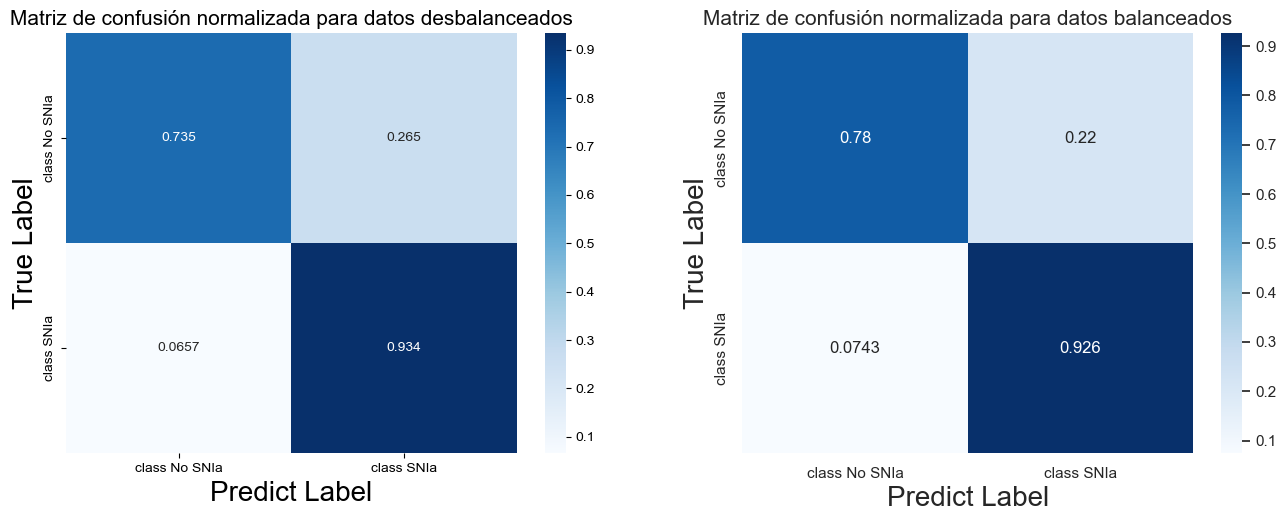

In [81]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn


columns = ['class %s' %(i) for i in np.unique(le.classes_)]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(2, 2, 1)

# DESBALANCEADOS
confm = confusion_matrix(Y_test, pred_labels,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(16,10)})
ax.set_title('Matriz de confusión normalizada para datos desbalanceados',fontsize=15)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

# BALANCEADOS
ax = fig.add_subplot(2, 2, 2)
confm = confusion_matrix(Y_test, pred_labels_smote,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(16,10)})
ax.set_title('Matriz de confusión normalizada para datos balanceados',fontsize=15)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)
plt.show()

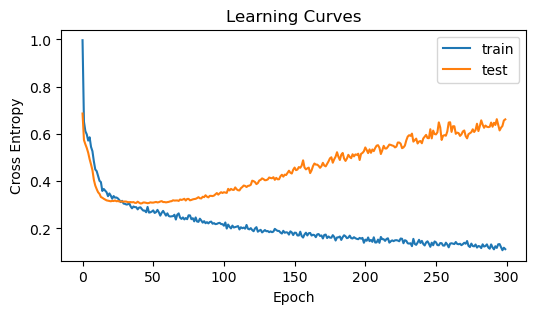

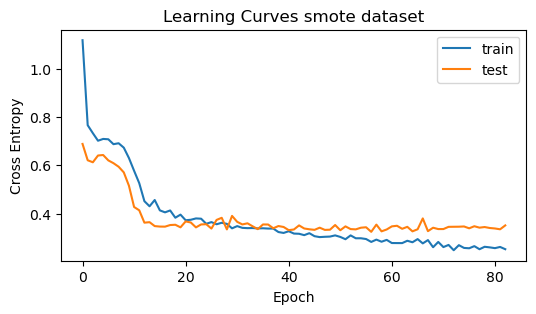

In [82]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
# plot learning curves

fig = plt.figure(figsize=(6, 3))
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

fig = plt.figure(figsize=(6, 3))
plt.title('Learning Curves smote dataset')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history_smote.history['loss'], label='train')
plt.plot(history_smote.history['val_loss'], label='test')
plt.legend()
plt.show()

In [69]:
# calculate accuracy
from sklearn import metrics
accuracy_0 = metrics.balanced_accuracy_score(Y_test, pred_labels)*100
presicion_0 = metrics.precision_score(Y_test, pred_labels,average='macro')*100
recall_0 = metrics.recall_score(Y_test, pred_labels,average='macro')*100
print("Modelo sin balancear")
print("Classification accuracy is %2f"%accuracy_0,"%")
print("Classification precision is %2f"%presicion_0,"%")
print("Classification recall is %2f"%recall_0,"%")

print("\n----------------------------------------------\n")

# calculate accuracy
accuracy_1 = metrics.balanced_accuracy_score(Y_test, pred_labels_smote)*100
presicion_1 = metrics.precision_score(Y_test, pred_labels_smote,average='macro')*100
recall_1 = metrics.recall_score(Y_test, pred_labels_smote,average='macro')*100
print("Modelo Balanceado")
print("Classification accuracy is %2f"%accuracy_1,"%")
print("Classification precision is %2f"%presicion_1,"%")
print("Classification recall is %2f"%recall_1,"%")

Modelo sin balancear
Classification accuracy is 81.948052 %
Classification precision is 87.286851 %
Classification recall is 81.948052 %

----------------------------------------------

Modelo Balanceado
Classification accuracy is 83.742424 %
Classification precision is 86.294003 %
Classification recall is 83.742424 %


In [23]:
models_smote

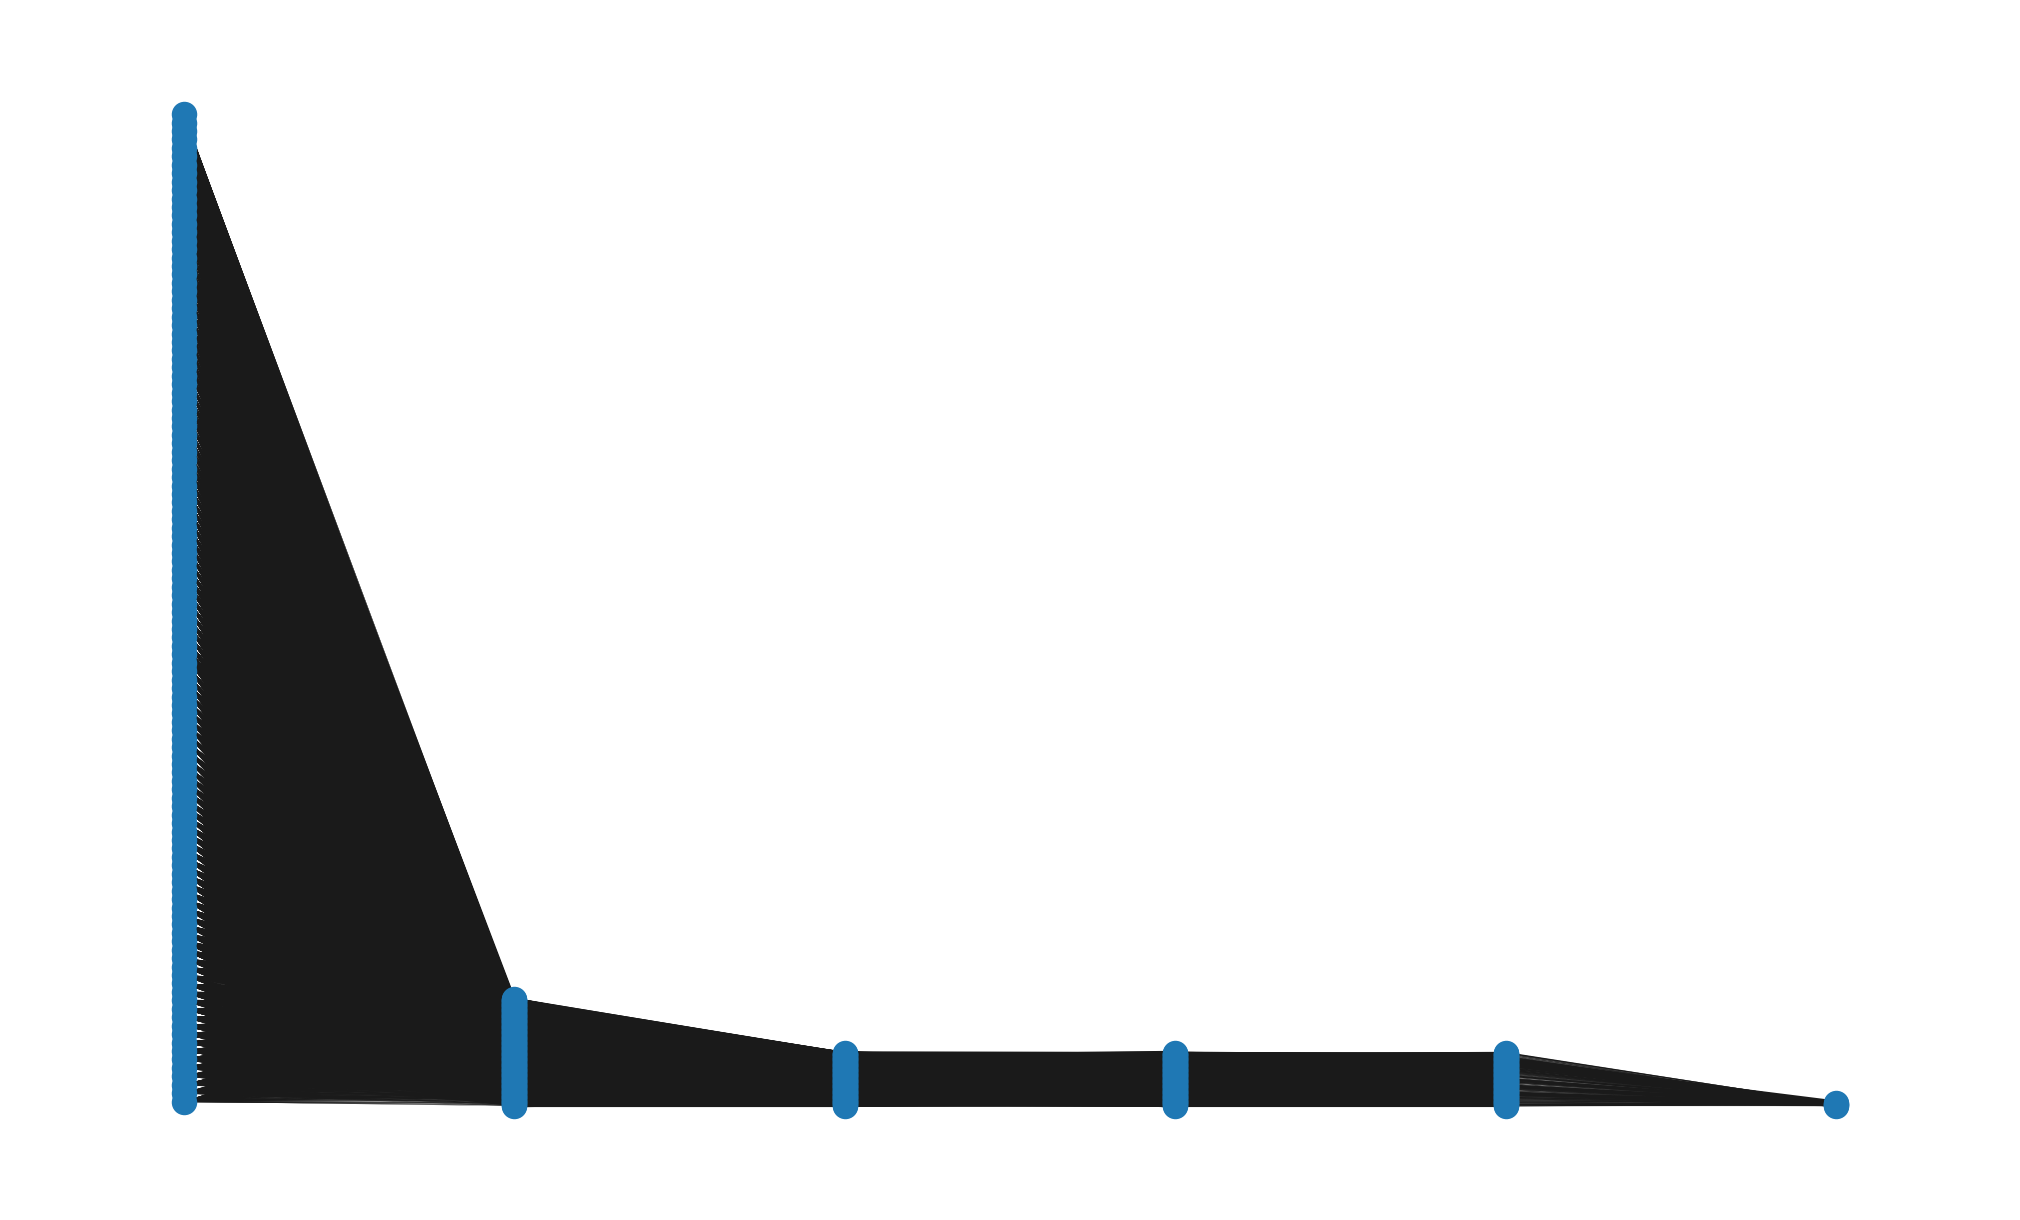

In [24]:
#@title Graficar nodos y pesos de la red:
#@markdown El siguiente bloque de código genera un grafico de la red neuronal utilizando la libreria NETWORKX. Simplemente haga click en ejecutar celda para ver sus resultados.
#@ 
#@markdown Para leer el código, haga doble click en este bloque de texto o en "mostrar codigo" y se expandirá el contenido

# Largo de el modelo (cantidad de pesos)
length = len(model.trainable_weights)

# Se define una constante para escalar el peso de manera logaritmica
e = 0.005

# importamos la libreria
import networkx as nx

# iniciamos el grafo
G = nx.Graph()

# definimos variable utiles para ubicar de manera correcta los nodos en el plano
k1 = 0
k2 = 0
n = 0

# iteramos sobre cada arreglo de pesos
for w_i in range(0,length,2):
  layer = model.trainable_weights[w_i]

  if np.min(layer)<0:
    layer = np.log(e+layer-np.min(layer))
  else:
    layer = np.log(e+layer)

  x = layer.shape[0]
  k1 = k2
  k2+=x
  y = layer.shape[1]

  # para cada arreglo, se inicializan los nodos y se crean las conexiones entre ellos

  for i in range(x):
    if w_i == 0:
      G.add_node(i,pos=(n,-5+10*i))

    if y != 2:
      for j in range(y):
        G.add_node(j+k2,pos=(n+1,j-10))
        G.add_edge(i+k1, j+k2, weight = layer[i][j])
    else:
      for j in range(y):
        G.add_node(j+k2,pos=(n+1,-5+10*j))
        G.add_edge(i+k1, j+k2, weight = layer[i][j])
      
  n+=1

# se extrae informacion de posicion de nodos y peso de las conexiones
pos=nx.get_node_attributes(G,'pos')
edges = G.edges()
weights = [G[u][v]['weight'] for u,v in edges]

# graficamos
plt.figure(figsize=(20,12)) 
nx.draw(G,pos,with_labels=False, width = weights)
plt.show()


In [25]:
# Guardar el Modelo
model_smote.save('Bests_models/model_smote_new_100.h5')

In [26]:
# Recrea exactamente el mismo modelo solo desde el archivo
loaded_model = tf.keras.models.load_model('Bests_models/model_smote_new_64.h5')
pred_labels_loaded = loaded_model.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad

# calculate accuracy
from sklearn import metrics
accuracy_l = metrics.balanced_accuracy_score(Y_test, pred_labels_loaded)*100
presicion_l = metrics.precision_score(Y_test, pred_labels_loaded,average='macro')*100
recall_l = metrics.recall_score(Y_test, pred_labels_loaded,average='macro')*100
print("Classification accuracy is %2f"%accuracy_l,"%")
print("Classification precision is %2f"%presicion_l,"%")
print("Classification recall is %2f"%recall_l,"%")

Classification accuracy is 4.645022 %
Classification precision is 26.485149 %
Classification recall is 2.322511 %


C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\sklearn\metrics\_classification.py:1854: UserWarning: y_pred contains classes not in y_true
  warnings.warn('y_pred contains classes not in y_true')
C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
#!tensorboard --logdir logs/fit
#http://localhost:6006/

# Se despliega Tensorboard

In [28]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs/fit (started 5 days, 2:34:11 ago; pid 18208)
  - port 6006: logdir logs/fit (started 12 days, 20:31:17 ago; pid 18880)


In [29]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000)     

Selecting TensorBoard with logdir logs/fit (started 5 days, 2:34:11 ago; port 6006, pid 18208).


In [30]:

arr_accuracy = [59.066158,53.75,52.12,52.63,52.81,50.60]
arr_precision = [64.582214,72.19,54.42,71.84,59.59,58.26]

#np.mean(arr_accuracy),np.mean(arr_precision),np.std(arr_accuracy),np.std(arr_precision)
print('{:.2f}'.format(np.mean(arr_accuracy)),"+/-",'{:.2f}'.format(np.std(arr_accuracy)))
print('{:.2f}'.format(np.mean(arr_precision)),"+/-",'{:.2f}'.format(np.std(arr_precision)))

53.50 +/- 2.66
63.48 +/- 6.73


In [31]:

arr_accuracy = [51.39, 43.33 ,43.59,55.09,49.80]
arr_precision = [58.91,40.74,40.86,63.16,57.58]

print('{:.2f}'.format(np.mean(arr_accuracy)),"+/-",'{:.2f}'.format(np.std(arr_accuracy)))
print('{:.2f}'.format(np.mean(arr_precision)),"+/-",'{:.2f}'.format(np.std(arr_precision)))

48.64 +/- 4.57
52.25 +/- 9.53


# Se trabaja con un subconjunto tomando las características más importantes de cada extractor

Selección de características

In [32]:
important_features = features_full.iloc[:,[1,3,5,6,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,32,33,34,40,47,51,52,53,54,55,56,57,58,103,104,105,106,107,108,109,110,112,113,114,115,116,117,119]]

In [33]:
binaria_important_features=True

In [34]:
#Descomentar para la clasificación multiclase
if binaria_important_features == False:
    important_features['classALeRCE']= important_features['classALeRCE'].replace(['SNIIb','SNIIn','SNII'],'SNII')
    num_output = 4
else:
    # para la clasificación binaria
    important_features['classALeRCE']= important_features['classALeRCE'].replace(['SNIIb','SNIIn','SLSN','SNII','SNIbc'],'No SNIa')
    num_output = 2

C:\Users\joaqu\.conda\envs\EL4106-gpu\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [35]:
cols = important_features.shape[1]
important_features = important_features.dropna(thresh=cols)

In [36]:
count_clase1 = pd.DataFrame({'classALeRCE':important_features['classALeRCE']})
count_clase1.groupby(count_clase1.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,No SNIa,438
1,SNIa,1166


In [37]:
# SEPARAMOS LOS CONJUNTOS DE ENTRENAMIENTO Y VALIDACIÓN
le = LabelEncoder()
X = important_features.iloc[:,1:-1]
Y = important_features['classALeRCE']
Y = le.fit_transform(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, stratify=Y)
# NORMALIZAMOS LOS DATOS
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform (X_test)

In [38]:
count_clase1 = pd.DataFrame({'classALeRCE':Y_train})
count_clase1.groupby(count_clase1.columns.tolist(),as_index=False).size()

,classALeRCE,size
0,0,306
1,1,816


In [39]:
from keras.layers import Input
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from tensorflow.keras.layers import Dropout

In [40]:
## Defining various initialization parameters for 163-80-40-4 MLP model

num_features = X_train.shape[1]
feature_vector_length = X_train.shape[1]


starter_learning_rate = 0.001
regularizer_rate = 0.1

# Set the input shape
input_shape = (feature_vector_length,)
print(f'Feature shape: {input_shape}')

Feature shape: (45,)


In [41]:
import time
inicio = time.time()

from sklearn import metrics
if binaria == True:
    oversample1 = SMOTE(sampling_strategy = 0.8)
else:
    oversample1 = SMOTE(sampling_strategy = {0:340,1:650,2:816,3:530}) 
    
X_train_smote, Y_train_smote = oversample1.fit_resample(X_train, Y_train)
    
results=[]
results_smote=[]
models=[]
models_smote=[]
for i in range(5):
    #--------Modelo datos desbalanceados------------------------
    dropout=0.5
    # Create the model
    model= Sequential(name='mlp_0')

    model.add( Input(shape=input_shape ) )
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dropout(dropout))
    model.add(Dense(units = 64, activation = 'sigmoid'))
    model.add(Dropout(dropout))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dropout(dropout))
    model.add(Dense(units = 64, activation = 'relu'))
    model.add(Dense(num_output, activation='softmax'))
    model.summary()
    
    

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=20)
    # Configure the model and start training
    model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
    history = model.fit(X_train, Y_train, epochs=300, batch_size=64, validation_data=(X_test, Y_test),callbacks=[callback])
    
    models.append(model)
    
    #Predecimos los datos para ver los resultados
    pred_labels_0 = model.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad
    #Metricas
    accuracy_0 = metrics.balanced_accuracy_score(Y_test, pred_labels_0)*100
    presicion_0 = metrics.precision_score(Y_test, pred_labels_0,average='macro')*100
    recall_0 = metrics.recall_score(Y_test, pred_labels_0,average='macro')*100
    
    results.append(  [pred_labels_0,accuracy_0,presicion_0,recall_0]  )
    #-------------------------------------------------------
    # CLASIFICADOR
    dropout=0.5
    # Create the model
    model_smote= Sequential(name='mlp_1')

    model_smote.add( Input(shape=input_shape ) )
    model_smote.add(Dense(128, activation='sigmoid'))
    model_smote.add(Dropout(dropout))
    model_smote.add(Dense(units = 128, activation = 'sigmoid'))
    model_smote.add(Dropout(dropout))
    model_smote.add(Dense(units = 64, activation = 'sigmoid'))
    model_smote.add(Dropout(dropout))
    model_smote.add(Dense(units = 64, activation = 'sigmoid'))
    model_smote.add(Dropout(dropout))
    model_smote.add(Dense(units = 64, activation = 'relu'))
    model_smote.add(Dropout(dropout))
    model_smote.add(Dense(units = 64, activation = 'relu'))
    model_smote.add(Dense(num_output, activation='softmax'))
    model_smote.summary()


    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=35)
    # Configure the model and start training
    model_smote.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['accuracy'])
    history_smote = model_smote.fit(X_train_smote, Y_train_smote, epochs=500, batch_size=64, validation_data=(X_test, Y_test),callbacks=[callback])
    
    models_smote.append(model_smote)
    pred_labels_smote_1 = model_smote.predict(X_test).argmax(axis=1) #clasificamos como la clase que tenga la mayor probabilidad
    
    accuracy_1 = metrics.balanced_accuracy_score(Y_test, pred_labels_smote_1)*100
    presicion_1 = metrics.precision_score(Y_test, pred_labels_smote_1,average='macro')*100
    recall_1 = metrics.recall_score(Y_test, pred_labels_smote_1,average='macro')*100
    print("Modelo Balanceado")
    print("Classification accuracy is %2f"%accuracy_1,"%")
    print("Classification precision is %2f"%presicion_1,"%")
    print("Classification recall is %2f"%recall_1,"%")
    
    results_smote.append(  [pred_labels_smote_1,accuracy_1,presicion_1,recall_1]  )

    
fin = time.time()
print(fin-inicio," segundos")

Model: "mlp_0"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 128)               5888      
_________________________________________________________________
dropout_35 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_36 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_57 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_37 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_58 (Dense)             (None, 64)                4160  

18/18 [==============================] - 1s 46ms/step - loss: 0.3223 - accuracy: 0.8877 - val_loss: 0.3592 - val_accuracy: 0.8755
Epoch 49/300
18/18 [==============================] - 1s 42ms/step - loss: 0.3128 - accuracy: 0.8788 - val_loss: 0.3575 - val_accuracy: 0.8797
Epoch 50/300
18/18 [==============================] - 1s 41ms/step - loss: 0.3091 - accuracy: 0.8797 - val_loss: 0.3526 - val_accuracy: 0.8755
Epoch 51/300
18/18 [==============================] - 1s 54ms/step - loss: 0.3202 - accuracy: 0.8832 - val_loss: 0.3589 - val_accuracy: 0.8734
Epoch 52/300
18/18 [==============================] - 0s 18ms/step - loss: 0.3209 - accuracy: 0.8832 - val_loss: 0.3647 - val_accuracy: 0.8776
Epoch 53/300
18/18 [==============================] - 1s 29ms/step - loss: 0.3115 - accuracy: 0.8797 - val_loss: 0.3531 - val_accuracy: 0.8797
Epoch 54/300
18/18 [==============================] - 0s 19ms/step - loss: 0.3068 - accuracy: 0.8850 - val_loss: 0.3530 - val_accuracy: 0.8755
Epoch 55/300

Epoch 105/300
18/18 [==============================] - 1s 30ms/step - loss: 0.2833 - accuracy: 0.8922 - val_loss: 0.3485 - val_accuracy: 0.8755
Epoch 106/300
18/18 [==============================] - ETA: 0s - loss: 0.2744 - accuracy: 0.89 - 0s 28ms/step - loss: 0.2744 - accuracy: 0.8930 - val_loss: 0.3448 - val_accuracy: 0.8693
Epoch 107/300
18/18 [==============================] - 1s 39ms/step - loss: 0.2886 - accuracy: 0.8975 - val_loss: 0.3529 - val_accuracy: 0.8755
Epoch 108/300
18/18 [==============================] - 1s 32ms/step - loss: 0.2747 - accuracy: 0.8948 - val_loss: 0.3446 - val_accuracy: 0.8693
Epoch 109/300
18/18 [==============================] - 0s 22ms/step - loss: 0.2773 - accuracy: 0.8922 - val_loss: 0.3456 - val_accuracy: 0.8693
Epoch 110/300
18/18 [==============================] - 1s 30ms/step - loss: 0.2798 - accuracy: 0.8966 - val_loss: 0.3456 - val_accuracy: 0.8714
Epoch 111/300
18/18 [==============================] - 1s 31ms/step - loss: 0.2756 - accuracy:

18/18 [==============================] - 1s 34ms/step - loss: 0.2610 - accuracy: 0.8948 - val_loss: 0.3401 - val_accuracy: 0.8755
Epoch 162/300
18/18 [==============================] - 1s 34ms/step - loss: 0.2531 - accuracy: 0.8939 - val_loss: 0.3456 - val_accuracy: 0.8797
Epoch 163/300
18/18 [==============================] - 1s 48ms/step - loss: 0.2531 - accuracy: 0.8948 - val_loss: 0.3465 - val_accuracy: 0.8797
Epoch 164/300
18/18 [==============================] - 1s 49ms/step - loss: 0.2576 - accuracy: 0.8966 - val_loss: 0.3476 - val_accuracy: 0.8797
Epoch 165/300
18/18 [==============================] - 1s 43ms/step - loss: 0.2557 - accuracy: 0.8922 - val_loss: 0.3438 - val_accuracy: 0.8776
Epoch 166/300
18/18 [==============================] - 1s 52ms/step - loss: 0.2567 - accuracy: 0.8975 - val_loss: 0.3489 - val_accuracy: 0.8776
Epoch 167/300
18/18 [==============================] - 1s 53ms/step - loss: 0.2546 - accuracy: 0.8975 - val_loss: 0.3443 - val_accuracy: 0.8797
Epoch 

18/18 [==============================] - 0s 19ms/step - loss: 0.2381 - accuracy: 0.9011 - val_loss: 0.3581 - val_accuracy: 0.8734
Epoch 219/300
18/18 [==============================] - 0s 26ms/step - loss: 0.2290 - accuracy: 0.9011 - val_loss: 0.3600 - val_accuracy: 0.8755
Epoch 220/300
18/18 [==============================] - 0s 22ms/step - loss: 0.2351 - accuracy: 0.8975 - val_loss: 0.3544 - val_accuracy: 0.8776
Epoch 221/300
18/18 [==============================] - 0s 27ms/step - loss: 0.2428 - accuracy: 0.9002 - val_loss: 0.3517 - val_accuracy: 0.8776
Epoch 222/300
18/18 [==============================] - 1s 30ms/step - loss: 0.2359 - accuracy: 0.9020 - val_loss: 0.3532 - val_accuracy: 0.8776
Epoch 223/300
18/18 [==============================] - 0s 20ms/step - loss: 0.2365 - accuracy: 0.8975 - val_loss: 0.3523 - val_accuracy: 0.8776
Epoch 224/300
18/18 [==============================] - 1s 38ms/step - loss: 0.2388 - accuracy: 0.9029 - val_loss: 0.3551 - val_accuracy: 0.8755
Epoch 

Epoch 1/500
23/23 [==============================] - 6s 115ms/step - loss: 0.7449 - accuracy: 0.5157 - val_loss: 0.6392 - val_accuracy: 0.7261
Epoch 2/500
23/23 [==============================] - 1s 50ms/step - loss: 0.7083 - accuracy: 0.5061 - val_loss: 0.6608 - val_accuracy: 0.7261
Epoch 3/500
23/23 [==============================] - 1s 48ms/step - loss: 0.6967 - accuracy: 0.5422 - val_loss: 0.6705 - val_accuracy: 0.7261
Epoch 4/500
23/23 [==============================] - 2s 76ms/step - loss: 0.6962 - accuracy: 0.5375 - val_loss: 0.6659 - val_accuracy: 0.7261
Epoch 5/500
23/23 [==============================] - 2s 77ms/step - loss: 0.6979 - accuracy: 0.5313 - val_loss: 0.6591 - val_accuracy: 0.7261
Epoch 6/500
23/23 [==============================] - 1s 53ms/step - loss: 0.6909 - accuracy: 0.5456 - val_loss: 0.6664 - val_accuracy: 0.7261
Epoch 7/500
23/23 [==============================] - 1s 37ms/step - loss: 0.6897 - accuracy: 0.5463 - val_loss: 0.6687 - val_accuracy: 0.7261
Epoch

23/23 [==============================] - 1s 53ms/step - loss: 0.3742 - accuracy: 0.8481 - val_loss: 0.4223 - val_accuracy: 0.8589
Epoch 58/500
23/23 [==============================] - 1s 30ms/step - loss: 0.3840 - accuracy: 0.8447 - val_loss: 0.4105 - val_accuracy: 0.8506
Epoch 59/500
23/23 [==============================] - 0s 21ms/step - loss: 0.3676 - accuracy: 0.8542 - val_loss: 0.4004 - val_accuracy: 0.8610
Epoch 60/500
23/23 [==============================] - 1s 23ms/step - loss: 0.3683 - accuracy: 0.8597 - val_loss: 0.3966 - val_accuracy: 0.8672
Epoch 61/500
23/23 [==============================] - 0s 19ms/step - loss: 0.3663 - accuracy: 0.8535 - val_loss: 0.4251 - val_accuracy: 0.8568
Epoch 62/500
23/23 [==============================] - 1s 26ms/step - loss: 0.3704 - accuracy: 0.8563 - val_loss: 0.4067 - val_accuracy: 0.8651
Epoch 63/500
23/23 [==============================] - 1s 27ms/step - loss: 0.3653 - accuracy: 0.8467 - val_loss: 0.4317 - val_accuracy: 0.8568
Epoch 64/500

23/23 [==============================] - 1s 25ms/step - loss: 0.3303 - accuracy: 0.8569 - val_loss: 0.3858 - val_accuracy: 0.8672
Epoch 115/500
23/23 [==============================] - 1s 25ms/step - loss: 0.3239 - accuracy: 0.8569 - val_loss: 0.3783 - val_accuracy: 0.8672
Epoch 116/500
23/23 [==============================] - 0s 20ms/step - loss: 0.3196 - accuracy: 0.8692 - val_loss: 0.3723 - val_accuracy: 0.8672
Epoch 117/500
23/23 [==============================] - 1s 22ms/step - loss: 0.3234 - accuracy: 0.8467 - val_loss: 0.3695 - val_accuracy: 0.8672
Epoch 118/500
23/23 [==============================] - 1s 45ms/step - loss: 0.3190 - accuracy: 0.8719 - val_loss: 0.3809 - val_accuracy: 0.8672
Epoch 119/500
23/23 [==============================] - 1s 30ms/step - loss: 0.3200 - accuracy: 0.8638 - val_loss: 0.3743 - val_accuracy: 0.8714
Epoch 120/500
23/23 [==============================] - 1s 32ms/step - loss: 0.3216 - accuracy: 0.8658 - val_loss: 0.3715 - val_accuracy: 0.8610
Epoch 

23/23 [==============================] - 2s 72ms/step - loss: 0.2885 - accuracy: 0.8719 - val_loss: 0.3597 - val_accuracy: 0.8693
Epoch 171/500
23/23 [==============================] - 1s 23ms/step - loss: 0.2776 - accuracy: 0.8801 - val_loss: 0.3602 - val_accuracy: 0.8714
Epoch 172/500
23/23 [==============================] - 0s 17ms/step - loss: 0.2835 - accuracy: 0.8781 - val_loss: 0.3601 - val_accuracy: 0.8714
Epoch 173/500
23/23 [==============================] - 0s 17ms/step - loss: 0.2929 - accuracy: 0.8747 - val_loss: 0.3720 - val_accuracy: 0.8610
Epoch 174/500
23/23 [==============================] - 0s 13ms/step - loss: 0.2901 - accuracy: 0.8815 - val_loss: 0.3677 - val_accuracy: 0.8672
Epoch 175/500
23/23 [==============================] - 0s 12ms/step - loss: 0.2859 - accuracy: 0.8740 - val_loss: 0.3581 - val_accuracy: 0.8651
Epoch 176/500
23/23 [==============================] - 0s 12ms/step - loss: 0.2796 - accuracy: 0.8794 - val_loss: 0.3767 - val_accuracy: 0.8568
Epoch 

KeyboardInterrupt: 

In [ ]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
# plot learning curves

fig = plt.figure(figsize=(6, 3))
plt.title('Learning Curves\n utilizando las caracteristicas más importantes')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

fig = plt.figure(figsize=(6, 3))
plt.title('Learning Curves smote dataset\n utilizando las caracteristicas más importantes')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(history_smote.history['loss'], label='train')
plt.plot(history_smote.history['val_loss'], label='test')
plt.legend()
plt.show()

In [ ]:
print("Modelo No Balanceado")
acc = []
acc_1 = []
pres = []
pres_1 = []
for r in results:
    print(f" Classification accuracy is {'{:.2f}'.format(r[1])} % \n Classification precision is {'{:.2f}'.format(r[2])} % \n Classification recall is {'{:.2f}'.format(r[3])} % \n")
    acc.append(r[1])
    pres.append(r[2])
print("Modelo Balanceado")    
for r in results_smote:
    print(f" Classification accuracy is {'{:.2f}'.format(r[1])} % \n Classification precision is {'{:.2f}'.format(r[2])} % \n Classification recall is {'{:.2f}'.format(r[3])} % \n")
    acc_1.append(r[1])
    pres_1.append(r[2])

In [ ]:
print("Desbalanceado accuracy",np.mean(acc),'+/-',np.std(acc))
print("balanceado accuracy",np.mean(acc_1),'+/-',np.std(acc_1))
print("Desbalanceado pres",np.mean(pres),'+/-',np.std(pres))
print("balanceado pres",np.mean(pres_1),'+/-',np.std(pres_1))

In [ ]:
pred_labels = results[3][0]
pred_labels_smote = results_smote[3][0]

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sn


columns = ['class %s' %(i) for i in np.unique(le.classes_)]

fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(2, 2, 1)

# DESBALANCEADOS
confm = confusion_matrix(Y_test, pred_labels,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(16,10)})
ax.set_title('Matriz de confusión normalizada para datos desbalanceados\n utilizando las caracteristicas más importantes',fontsize=15)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)

# BALANCEADOS
ax = fig.add_subplot(2, 2, 2)
confm = confusion_matrix(Y_test, pred_labels_smote,normalize='true')
df_cm = pd.DataFrame(confm, index=columns, columns=columns)
ax = sn.heatmap(df_cm, cmap='Blues',fmt='.3g', annot=True)
sn.set(rc={'figure.figsize':(16,10)})
ax.set_title('Matriz de confusión normalizada para datos balanceados\n utilizando las caracteristicas más importantes',fontsize=15)
ax.set_xlabel('Predict Label',fontsize=20)
ax.set_ylabel('True Label',fontsize=20)
plt.show()

In [ ]:
import numpy as np

print("Desbalanceado accuracy",np.mean(acc),'+/-',np.std(acc))
print("balanceado accuracy",np.mean(acc_1),'+/-',np.std(acc_1))
print("Desbalanceado pres",np.mean(pres),'+/-',np.std(pres))
print("balanceado pres",np.mean(pres_1),'+/-',np.std(pres_1))